<a href="https://colab.research.google.com/github/noahrychener/DSF-DCBP-NR/blob/main/CodingTask1_Noah_Rychener.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 1

- Deadline (upload to Ilias): 2022-03-20 24:00
- Estimated effort: 2-5 hours
- Data on Ilias (4ms_...) with metadata file CCD-Metadata


## Tasks (maximum 12.5 points)

- Write a method (function) which removes the header information in the datafile and saves that information into a separate textfile. [0.5 points] 
- Write a function which reduces the data resolution by averaging over 1, 2, 3 and 4 nm wavelengths. Save these 4 new reduced datasets in new files. Do this (1) by writing an explicit loop and (2) by using pandas methods. Measure the running times of the two approaches. [6 points]
- Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2 points] 
- Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file. [2 points]
- Plot the full and the reduced datasets in the same figure. Is there any visual difference? [2 points]

### 1. Safe the header information into a seperate .txt file 

In [72]:
# import tools from libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [73]:
# mount directory and the data file
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/Coding Task 1/4ms_10 av_30 s_Absorbance_10-32-04-868.txt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [205]:
df = pd.read_csv(path, delimiter='\t', header = 13) # define the header of the file.
df = df.drop(columns = "Unnamed: 0") # removing the first column, e.g. time given in text.
df = df.rename(columns={"Unnamed: 1": "time_num [s]"}) # renaming the numerical time to 'time_num'.
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Coding Task 1/task1_data.csv') # safe the header information into a '.csv' file.

# normalizing the time_num [s] to t(0) = 0 [s] using a method function.
def time():
  a = df.iloc[:,0]
  b = a[0]
  for i in range(len(a)):
    a[i] = a[i] - b
time()
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Coding Task 1/task1_naked_data.csv') # safe the raw data w/o header as task1_naked_data.csv to the def. directory
df[:-5] # show the first and last five rows of the df.
# df.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,time_num [s],316.6137,316.7492,316.8847,317.0203,317.1558,317.2913,317.4268,317.5623,317.6977,...,778.9703,779.089,779.2076,779.3263,779.4449,779.5636,779.6822,779.8008,779.9194,780.0381
0,0,0.329672,0.329672,0.329672,0.090294,-0.716926,-1.829304,-0.686330,-0.428776,1.740363,...,-0.038483,-0.039623,-0.036920,-0.037309,-0.037299,-0.037476,-0.036856,-0.036853,-0.039100,-0.035545
1,89,-0.044412,-0.044412,-0.044412,0.157632,-0.672423,-2.183981,-0.492421,-0.000000,-0.695800,...,-0.039428,-0.038486,-0.037309,-0.036357,-0.037289,-0.038728,-0.037214,-0.036902,-0.040210,-0.038165
2,173,0.338219,0.338219,0.338219,0.330993,-0.879836,-0.000000,-0.559845,-0.000000,-0.275276,...,-0.037725,-0.037534,-0.036560,-0.036152,-0.036554,-0.036875,-0.037351,-0.036746,-0.038686,-0.036903
3,257,-0.049682,-0.049682,-0.049682,0.519086,-0.681150,-0.000000,-0.417230,-0.000000,-0.140451,...,-0.037613,-0.037168,-0.036369,-0.034549,-0.036252,-0.037948,-0.036713,-0.035706,-0.038203,-0.036822
4,340,0.335086,0.335086,0.335086,-0.041393,-0.000000,-1.802774,-0.510417,-0.000000,-0.000000,...,-0.040919,-0.038288,-0.035840,-0.035638,-0.039504,-0.040093,-0.039953,-0.037656,-0.038082,-0.035900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,29190,0.327377,0.327377,0.327377,-0.084545,-0.610703,-1.701136,-0.646040,-0.337365,-0.000000,...,-0.037655,-0.036256,-0.037135,-0.033259,-0.036576,-0.036220,-0.035828,-0.036743,-0.037258,-0.033387
346,29274,0.849559,0.849559,0.849559,0.258945,0.245775,-0.000000,-0.374113,-0.466056,-0.081369,...,-0.035420,-0.036194,-0.035676,-0.034751,-0.034562,-0.035755,-0.036625,-0.035341,-0.037771,-0.034683
347,29358,0.333751,0.333751,0.333751,0.075539,-0.451655,-0.000000,-0.629710,0.056823,-0.536864,...,-0.038563,-0.036604,-0.038682,-0.034857,-0.036381,-0.036967,-0.036207,-0.035561,-0.038084,-0.033631
348,29442,0.842144,0.842144,0.842144,0.006525,-0.107687,-0.000000,-0.392017,-0.351271,-0.000000,...,-0.035657,-0.037125,-0.036921,-0.035408,-0.036993,-0.036793,-0.036874,-0.036189,-0.036998,-0.034847



## 2. Reducing data

### 2.1 Loop
No solution

### 2.2 Pandas


In [246]:
# Reducing the data: 1825 from 3649 columns (1/2)
df = df.transpose()
d = df.groupby(np.arange(len(df.index))//2).mean()
e = d.transpose()
e.to_csv('/content/drive/MyDrive/Colab Notebooks/Coding Task 1/wavelength_050.csv')

In [224]:
# Reducing the data: 1217 from 3649 columns (1/3)
df = df.transpose()
f = df.groupby(np.arange(len(df.index))//3).mean()
f = d.transpose()
# f.to_csv('/content/drive/MyDrive/Colab Notebooks/Coding Task 1/wavelength_033.csv')


In [223]:
# Reducing the data: 912 from 3649 columns (1/4)
df = df.transpose()
g = df.groupby(np.arange(len(df.index))//4).mean()
g = d.transpose()
g.to_csv('/content/drive/MyDrive/Colab Notebooks/Coding Task 1/wavelength_025.csv')

In [226]:
# df.groupby(np.arange(len([df.index])//2).mean(axis = 1)
# df.groupby(np.arange(len(df.index))//2).mean() # faster
# df.groupby(np.arange(len(df))//2).mean() # slower
# df['avg'] = df.iloc[:,0:2].mean(axis=1)
# df['avg']

In [228]:
# df.columns[1]# access columns by position.
# df.iloc[1, 10] # ...
# df[1,:]

#### 2.2.1 Measuring the time

In [254]:
%%time
# Reducing the data: 1825 from 3649 columns (1/2)
df = df.transpose()
d = df.groupby(np.arange(len(df.index))//2).mean()
e = d.transpose()
e.to_csv('/content/drive/MyDrive/Colab Notebooks/Coding Task 1/wavelength_050.csv')

CPU times: user 679 ms, sys: 15.3 ms, total: 694 ms
Wall time: 731 ms


## 3. Difference between two wavelengths

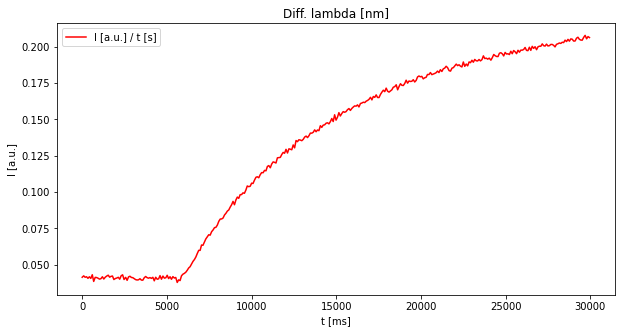

In [244]:
# Plotting the difference of the intensity I [a.u.] between two different wavelengths over the time t [ms].
x = df.iloc[:,0]
x = df.iloc[:,0]
y = -(df.iloc[:,1950]-df.iloc[:,1800])

plt.figure(figsize = (10,5))
plt.plot(x,y, color='red', label = 'I [a.u.] / t [s]')
plt.xlabel('t [ms]')
plt.ylabel('I [a.u.]')
plt.title('Diff. lambda [nm]')
plt.legend()

## 4. Full and reduced dataset in one plot

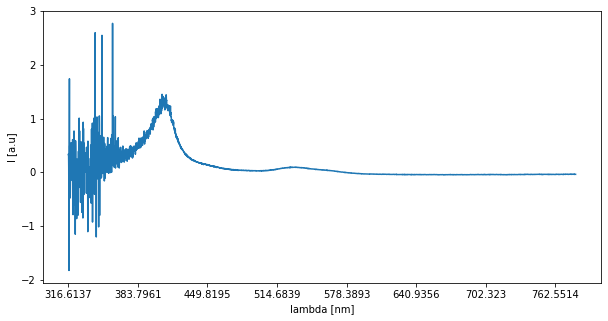

In [245]:
x = df.iloc[:,0]
y = -(df.iloc[:,1950]-df.iloc[:,1800])
plt.figure(figsize = (10,5))
plt.xlabel('lambda [nm]')
plt.ylabel('I [a.u]')
df1 = df.iloc[0,1:-1]
df1.plot()

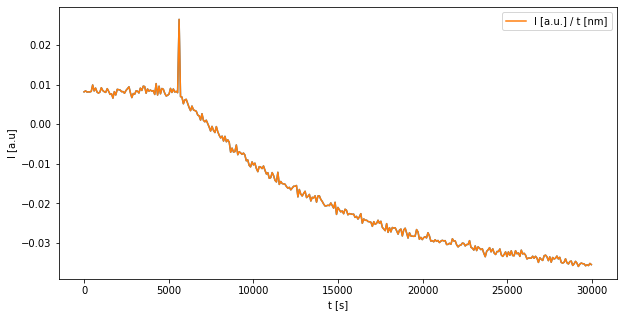

In [243]:
plt.figure(figsize = (10,5))
plt.plot(x, y)
x = df.iloc[:,0]
y = df.iloc[:,1950]
plt.plot(x, y, label = 'I [a.u.] / t [nm]') # Plot against a x-axis (0-60 s).
y_new = -(df.iloc[:,1950]-df.iloc[:,1800]) # Interested in the difference between two wafelengths
plt.xlabel('t [s]')
plt.ylabel('I [a.u]')
plt.legend()